In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer



In [5]:
!pip install wordcloud

In [6]:
from wordcloud import WordCloud

In [7]:
with open('C:/Users/RDX/Desktop/Varun/Machine Learning/Logistic reg/Acknowledgment.txt','r') as f:
    text=f.readlines()

In [8]:
text=[line.strip() for line in text]
print(text)

['Dear Dr. Vinod,', 'We place on record our heartfelt gratitude for your continuous efforts in designing the National Level FDP programs – ‘Data Analysis through SPSS’, in house FDPs on the same subject and FDPs on Excel for faculty members repeatedly. The recent National Level MDP on ‘Business Analytics with R and Python’ was well received by faculty members and working professionals from the industry alike and has left us with positive enquires.', 'The ideas nurtured, guidance offered, papers reviewed during all the conferences, working as session chair during the conferences and the sessions conducted  for teaching and learning communities - all have made a difference. Thank you for all the above and many more activities such as guiding faculty members through data analysis of their research work (Dr. Madhavi R, Ms. Smita S K, etc.), guest lectures for PG Commerce students, etc.', 'The new ideas designed include National Level MDP/FDPs on ‘Data Visualization and Spreadsheet Modeling

In [10]:
with open('C:/Users/RDX/Desktop/Varun/Machine Learning/Logistic reg/Acknowledgment.txt','r') as f:
    chunk_1=f.readlines()

In [11]:
chunk_1=[line.strip() for line in text]

In [12]:
print(chunk_1)

['Dear Dr. Vinod,', 'We place on record our heartfelt gratitude for your continuous efforts in designing the National Level FDP programs – ‘Data Analysis through SPSS’, in house FDPs on the same subject and FDPs on Excel for faculty members repeatedly. The recent National Level MDP on ‘Business Analytics with R and Python’ was well received by faculty members and working professionals from the industry alike and has left us with positive enquires.', 'The ideas nurtured, guidance offered, papers reviewed during all the conferences, working as session chair during the conferences and the sessions conducted  for teaching and learning communities - all have made a difference. Thank you for all the above and many more activities such as guiding faculty members through data analysis of their research work (Dr. Madhavi R, Ms. Smita S K, etc.), guest lectures for PG Commerce students, etc.', 'The new ideas designed include National Level MDP/FDPs on ‘Data Visualization and Spreadsheet Modeling

In [13]:
chunk_pasted_1=' '.join(chunk_1)

In [14]:
chunk_pasted_1

'Dear Dr. Vinod, We place on record our heartfelt gratitude for your continuous efforts in designing the National Level FDP programs – ‘Data Analysis through SPSS’, in house FDPs on the same subject and FDPs on Excel for faculty members repeatedly. The recent National Level MDP on ‘Business Analytics with R and Python’ was well received by faculty members and working professionals from the industry alike and has left us with positive enquires. The ideas nurtured, guidance offered, papers reviewed during all the conferences, working as session chair during the conferences and the sessions conducted  for teaching and learning communities - all have made a difference. Thank you for all the above and many more activities such as guiding faculty members through data analysis of their research work (Dr. Madhavi R, Ms. Smita S K, etc.), guest lectures for PG Commerce students, etc. The new ideas designed include National Level MDP/FDPs on ‘Data Visualization and Spreadsheet Modeling’, MDP on 

In [15]:
clean_data1=chunk_pasted_1.lower()
clean_data1

'dear dr. vinod, we place on record our heartfelt gratitude for your continuous efforts in designing the national level fdp programs – ‘data analysis through spss’, in house fdps on the same subject and fdps on excel for faculty members repeatedly. the recent national level mdp on ‘business analytics with r and python’ was well received by faculty members and working professionals from the industry alike and has left us with positive enquires. the ideas nurtured, guidance offered, papers reviewed during all the conferences, working as session chair during the conferences and the sessions conducted  for teaching and learning communities - all have made a difference. thank you for all the above and many more activities such as guiding faculty members through data analysis of their research work (dr. madhavi r, ms. smita s k, etc.), guest lectures for pg commerce students, etc. the new ideas designed include national level mdp/fdps on ‘data visualization and spreadsheet modeling’, mdp on 

In [16]:
clean_data2=re.sub(r'[^\w\s]','',clean_data1)
clean_data2

'dear dr vinod we place on record our heartfelt gratitude for your continuous efforts in designing the national level fdp programs  data analysis through spss in house fdps on the same subject and fdps on excel for faculty members repeatedly the recent national level mdp on business analytics with r and python was well received by faculty members and working professionals from the industry alike and has left us with positive enquires the ideas nurtured guidance offered papers reviewed during all the conferences working as session chair during the conferences and the sessions conducted  for teaching and learning communities  all have made a difference thank you for all the above and many more activities such as guiding faculty members through data analysis of their research work dr madhavi r ms smita s k etc guest lectures for pg commerce students etc the new ideas designed include national level mdpfdps on data visualization and spreadsheet modeling mdp on business analytics with pytho

In [18]:
clean_data3=re.sub(r'\d+',' ',clean_data2)
clean_data3

'dear dr vinod we place on record our heartfelt gratitude for your continuous efforts in designing the national level fdp programs  data analysis through spss in house fdps on the same subject and fdps on excel for faculty members repeatedly the recent national level mdp on business analytics with r and python was well received by faculty members and working professionals from the industry alike and has left us with positive enquires the ideas nurtured guidance offered papers reviewed during all the conferences working as session chair during the conferences and the sessions conducted  for teaching and learning communities  all have made a difference thank you for all the above and many more activities such as guiding faculty members through data analysis of their research work dr madhavi r ms smita s k etc guest lectures for pg commerce students etc the new ideas designed include national level mdpfdps on data visualization and spreadsheet modeling mdp on business analytics with pytho

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RDX\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [26]:
stop_words=set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RDX\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [22]:
tokens=word_tokenize(clean_data3)

In [27]:
clean_data4=[i for i in tokens if not i in stop_words]
clean_data4

['dear',
 'dr',
 'vinod',
 'place',
 'record',
 'heartfelt',
 'gratitude',
 'continuous',
 'efforts',
 'designing',
 'national',
 'level',
 'fdp',
 'programs',
 'data',
 'analysis',
 'spss',
 'house',
 'fdps',
 'subject',
 'fdps',
 'excel',
 'faculty',
 'members',
 'repeatedly',
 'recent',
 'national',
 'level',
 'mdp',
 'business',
 'analytics',
 'r',
 'python',
 'well',
 'received',
 'faculty',
 'members',
 'working',
 'professionals',
 'industry',
 'alike',
 'left',
 'us',
 'positive',
 'enquires',
 'ideas',
 'nurtured',
 'guidance',
 'offered',
 'papers',
 'reviewed',
 'conferences',
 'working',
 'session',
 'chair',
 'conferences',
 'sessions',
 'conducted',
 'teaching',
 'learning',
 'communities',
 'made',
 'difference',
 'thank',
 'many',
 'activities',
 'guiding',
 'faculty',
 'members',
 'data',
 'analysis',
 'research',
 'work',
 'dr',
 'madhavi',
 'r',
 'ms',
 'smita',
 'k',
 'etc',
 'guest',
 'lectures',
 'pg',
 'commerce',
 'students',
 'etc',
 'new',
 'ideas',
 'designed

In [28]:
clean_data4=' '.join(str(x) for x in clean_data4)
clean_data4

'dear dr vinod place record heartfelt gratitude continuous efforts designing national level fdp programs data analysis spss house fdps subject fdps excel faculty members repeatedly recent national level mdp business analytics r python well received faculty members working professionals industry alike left us positive enquires ideas nurtured guidance offered papers reviewed conferences working session chair conferences sessions conducted teaching learning communities made difference thank many activities guiding faculty members data analysis research work dr madhavi r ms smita k etc guest lectures pg commerce students etc new ideas designed include national level mdpfdps data visualization spreadsheet modeling mdp business analytics python etc undoubtedly new feathers cap adorning work university research activities define universitys quality work contributed positively wish many successful programs laurels years come regards dr b vasu center head school commerceju ph email vasubajainun

In [29]:
clean_data5=' '.join(i for i in clean_data4.split() if not (i.isalpha() and len(i)==1))

In [30]:
clean_data5

'dear dr vinod place record heartfelt gratitude continuous efforts designing national level fdp programs data analysis spss house fdps subject fdps excel faculty members repeatedly recent national level mdp business analytics python well received faculty members working professionals industry alike left us positive enquires ideas nurtured guidance offered papers reviewed conferences working session chair conferences sessions conducted teaching learning communities made difference thank many activities guiding faculty members data analysis research work dr madhavi ms smita etc guest lectures pg commerce students etc new ideas designed include national level mdpfdps data visualization spreadsheet modeling mdp business analytics python etc undoubtedly new feathers cap adorning work university research activities define universitys quality work contributed positively wish many successful programs laurels years come regards dr vasu center head school commerceju ph email vasubajainuniversity

In [31]:
clean_data6=clean_data5.strip()
clean_data6

'dear dr vinod place record heartfelt gratitude continuous efforts designing national level fdp programs data analysis spss house fdps subject fdps excel faculty members repeatedly recent national level mdp business analytics python well received faculty members working professionals industry alike left us positive enquires ideas nurtured guidance offered papers reviewed conferences working session chair conferences sessions conducted teaching learning communities made difference thank many activities guiding faculty members data analysis research work dr madhavi ms smita etc guest lectures pg commerce students etc new ideas designed include national level mdpfdps data visualization spreadsheet modeling mdp business analytics python etc undoubtedly new feathers cap adorning work university research activities define universitys quality work contributed positively wish many successful programs laurels years come regards dr vasu center head school commerceju ph email vasubajainuniversity

In [32]:
words_dict={}

for word in clean_data6.split():
    words_dict[word]=words_dict.get(word,0)+1
for key in sorted(words_dict):
    print('{}:{}'.format(key,words_dict[key]))

academic:2
achieve:1
acknowledgement:1
activities:2
actually:1
adorning:1
alike:1
analysis:2
analytics:2
assignments:1
business:2
cap:1
center:1
chair:1
class:1
come:1
commerce:1
commerceju:1
communities:1
conceptual:1
conducted:1
conferences:2
continuous:1
contributed:1
data:3
dear:1
define:1
demonstration:1
designed:1
designing:1
desire:1
difference:1
dr:4
eagerly:1
edge:1
efforts:1
email:1
end:1
engineered:1
enjoy:1
enquires:1
ensemble:1
entire:1
etc:3
excel:1
fabulous:1
faculty:3
fdp:1
fdps:2
fdpsmdpsworkshopsconferences:1
feathers:1
foresightedness:1
forward:1
goes:1
gratitude:1
guest:1
guidance:1
guiding:1
happiness:1
head:1
heartfelt:1
high:1
house:1
ideas:2
include:1
industry:1
kind:1
knowledge:1
laurels:1
leadership:3
learning:1
lectures:1
left:1
level:3
looking:1
made:1
madhavi:1
many:2
mdp:2
mdpfdps:1
members:3
modeling:1
moreover:1
ms:1
much:1
national:3
new:2
nurture:1
nurtured:1
offered:1
papers:1
passionate:1
perfect:1
perfectly:1
pg:1
ph:1
place:1
positioning:1
positive

In [33]:
wordcloud=WordCloud(width=480,height=480,margin=0).generate(clean_data6)

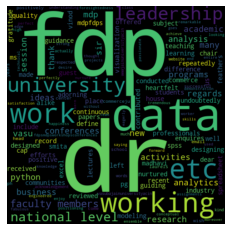

In [34]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()

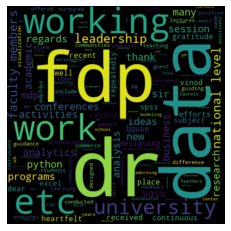

In [35]:
wordcloud=WordCloud(width=480,height=480,margin=3).generate(clean_data6)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()

In [37]:
wordcloud=WordCloud(width=480,height=480,colormap='Oranges_r').generate(clean_data6)

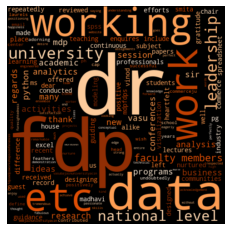

In [38]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()

In [39]:
#Sentimental Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [40]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\RDX\AppData\Roaming\nltk_data...


True

In [41]:
analyzer=SentimentIntensityAnalyzer()

In [42]:
scores=analyzer.polarity_scores(clean_data6)

In [43]:
for key in sorted(scores):
    print('{0}:{1},'.format(key,scores[key]),end='')

compound:0.9978,neg:0.0,neu:0.657,pos:0.343,